Write a program to demonstrate the change in accuracy/loss/convergence time with change in optimizers like stochastic gradient descent, adam, adagrad, RMSprop and Nadam for any suitable application

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes1.csv to diabetes1.csv


In [ ]:
df = pd.read_csv('/content/diabetes1.csv')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# splitting data into independent and dependent variables
X = df.iloc[:, 0:8]
y = df["Outcome"] 
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (768, 8)
y shape:  (768,)


In [ ]:
# standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (691, 8)
X_test shape:  (77, 8)
y_train shape:  (691,)
y_test shape:  (77,)


# Adam

In [ ]:
# define model
model_adam = models.Sequential()
model_adam.add(layers.Dense(100, activation="relu"))
model_adam.add(layers.Dense(50, activation="relu"))
model_adam.add(layers.Dense(25, activation="relu"))
model_adam.add(layers.Dense(12, activation="relu"))
model_adam.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
# adam optimizer 
model_adam.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# train adam model
history_adam = model_adam.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 2s 13ms/step - loss: 0.6419 - accuracy: 0.7019 - val_loss: 0.6128 - val_accuracy: 0.7013
Epoch 2/15
22/22 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7829 - val_loss: 0.5580 - val_accuracy: 0.7013
Epoch 3/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4581 - accuracy: 0.7858 - val_loss: 0.5587 - val_accuracy: 0.7013
Epoch 4/15
22/22 [==============================] - 0s 5ms/step - loss: 0.4371 - accuracy: 0.7974 - val_loss: 0.5542 - val_accuracy: 0.7143
Epoch 5/15
22/22 [==============================] - 0s 5ms/step - loss: 0.4377 - accuracy: 0.7858 - val_loss: 0.5238 - val_accuracy: 0.7273
Epoch 6/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4228 - accuracy: 0.8032 - val_loss: 0.5330 - val_accuracy: 0.7273
Epoch 7/15
22/22 [==============================] - 0s 5ms/step - loss: 0.4157 - accuracy: 0.8032 - val_loss: 0.5194 - val_accuracy: 0.7403
Epoch 8/15
22/22 [=

Text(0, 0.5, 'Accuracy')

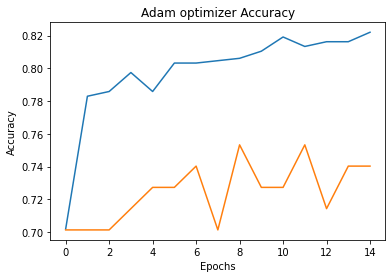

In [ ]:
# plot accuracy
plt.plot(history_adam.history['accuracy'], label='accuracy')
plt.plot(history_adam.history['val_accuracy'], label='val_accuracy')
plt.title("Adam optimizer Accuracy")
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Adagrad

In [ ]:
# define model
model_adagrad = models.Sequential()
model_adagrad.add(layers.Dense(100, activation="relu"))
model_adagrad.add(layers.Dense(50, activation="relu"))
model_adagrad.add(layers.Dense(25, activation="relu"))
model_adagrad.add(layers.Dense(12, activation="relu"))
model_adagrad.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
# adam optimizer 
model_adagrad.compile(optimizer="Adagrad", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# train adagrad model
history_adagrad = model_adagrad.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 1s 10ms/step - loss: 0.6989 - accuracy: 0.4732 - val_loss: 0.6957 - val_accuracy: 0.4545
Epoch 2/15
22/22 [==============================] - 0s 5ms/step - loss: 0.6955 - accuracy: 0.5195 - val_loss: 0.6932 - val_accuracy: 0.5325
Epoch 3/15
22/22 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5470 - val_loss: 0.6911 - val_accuracy: 0.5714
Epoch 4/15
22/22 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5876 - val_loss: 0.6894 - val_accuracy: 0.6234
Epoch 5/15
22/22 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.6064 - val_loss: 0.6880 - val_accuracy: 0.6494
Epoch 6/15
22/22 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.6179 - val_loss: 0.6867 - val_accuracy: 0.6494
Epoch 7/15
22/22 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.6310 - val_loss: 0.6856 - val_accuracy: 0.6753
Epoch 8/15
22/22 [=

Text(0, 0.5, 'Accuracy')

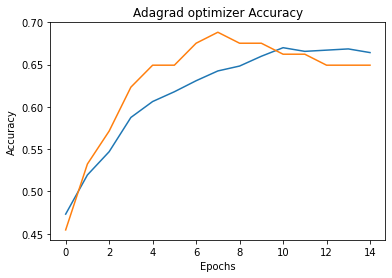

In [ ]:
# plot accuracy
plt.plot(history_adagrad.history['accuracy'], label='accuracy')
plt.plot(history_adagrad.history['val_accuracy'], label='val_accuracy')
plt.title("Adagrad optimizer Accuracy")
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# RMSprop

In [ ]:
# define model
model_rmsprop = models.Sequential()
model_rmsprop.add(layers.Dense(100, activation="relu"))
model_rmsprop.add(layers.Dense(50, activation="relu"))
model_rmsprop.add(layers.Dense(25, activation="relu"))
model_rmsprop.add(layers.Dense(12, activation="relu"))
model_rmsprop.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
# adam optimizer 
model_rmsprop.compile(optimizer="RMSprop", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# train rmsprop model
history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 1s 10ms/step - loss: 0.6140 - accuracy: 0.7308 - val_loss: 0.5862 - val_accuracy: 0.7013
Epoch 2/15
22/22 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.7771 - val_loss: 0.5528 - val_accuracy: 0.7143
Epoch 3/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4616 - accuracy: 0.7916 - val_loss: 0.5412 - val_accuracy: 0.7143
Epoch 4/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4473 - accuracy: 0.7945 - val_loss: 0.5207 - val_accuracy: 0.7403
Epoch 5/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4401 - accuracy: 0.7931 - val_loss: 0.5311 - val_accuracy: 0.7143
Epoch 6/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4369 - accuracy: 0.7988 - val_loss: 0.5289 - val_accuracy: 0.7143
Epoch 7/15
22/22 [==============================] - 0s 4ms/step - loss: 0.4278 - accuracy: 0.7988 - val_loss: 0.5219 - val_accuracy: 0.7273
Epoch 8/15
22/22 [=

Text(0, 0.5, 'Accuracy')

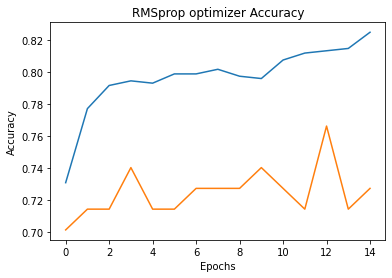

In [ ]:
# plot accuracy
plt.plot(history_rmsprop.history['accuracy'], label='accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], label='val_accuracy')
plt.title("RMSprop optimizer Accuracy")
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Sgd

In [ ]:
# define model
model_sgd = models.Sequential()
model_sgd.add(layers.Dense(100, activation="relu"))
model_sgd.add(layers.Dense(50, activation="relu"))
model_sgd.add(layers.Dense(25, activation="relu"))
model_sgd.add(layers.Dense(12, activation="relu"))
model_sgd.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
# adam optimizer 
model_sgd.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# train sgd model
history_sgd = model_sgd.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
22/22 [==============================] - 1s 10ms/step - loss: 0.6962 - accuracy: 0.5051 - val_loss: 0.6926 - val_accuracy: 0.5844
Epoch 2/15
22/22 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.6498 - val_loss: 0.6818 - val_accuracy: 0.6104
Epoch 3/15
22/22 [==============================] - 0s 4ms/step - loss: 0.6649 - accuracy: 0.6657 - val_loss: 0.6727 - val_accuracy: 0.6104
Epoch 4/15
22/22 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6628 - val_loss: 0.6658 - val_accuracy: 0.5974
Epoch 5/15
22/22 [==============================] - 0s 4ms/step - loss: 0.6415 - accuracy: 0.6614 - val_loss: 0.6604 - val_accuracy: 0.5974
Epoch 6/15
22/22 [==============================] - 0s 3ms/step - loss: 0.6325 - accuracy: 0.6614 - val_loss: 0.6555 - val_accuracy: 0.5974
Epoch 7/15
22/22 [==============================] - 0s 4ms/step - loss: 0.6242 - accuracy: 0.6628 - val_loss: 0.6509 - val_accuracy: 0.5974
Epoch 8/15
22/22 [=

Text(0, 0.5, 'Accuracy')

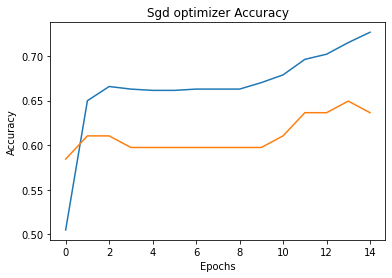

In [ ]:
# plot accuracy
plt.plot(history_sgd.history['accuracy'], label='accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='val_accuracy')
plt.title("Sgd optimizer Accuracy")
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")